In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

## Getting the data

From Yahoo Finance's Historical Prices: [Apple Inc. (AAPL) stock](http://finance.yahoo.com/q/hp?s=AAPL): http://finance.yahoo.com/q/hp?s=AAPL

Direct link to __CSV for 2012-01-01 to 2015-05-01__: 

http://real-chart.finance.yahoo.com/table.csv?s=AAPL&a=00&b=1&c=2013&d=04&e=1&f=2015&g=d


We can use [__pandas.io.parsers.read_csv()__](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html) to download the CSV file from the URL, then read the data into a DataFrame.

The `parse_dates` argument takes in a __list__ of column numbers, in which we can use to tell pandas which columns are meant to be dates. In this case, it's the _first_ column, i.e. the _0th_:


In [20]:
csvurl = "http://real-chart.finance.yahoo.com/table.csv?s=AAPL&a=00&b=1&c=2010&d=04&e=1&f=2015&g=d"
prices = pd.read_csv(csvurl, parse_dates = [0])

In [4]:
prices.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-05-01,126.10000,130.13000,125.30000,128.95000,57195000,128.95000
1,2015-04-30,128.64000,128.64000,124.58000,125.15000,82475900,125.15000
2,2015-04-29,130.16000,131.59000,128.30000,128.64000,62410800,128.64000
3,2015-04-28,134.46001,134.53999,129.57001,130.56000,118580700,130.56000
4,2015-04-27,132.31000,133.13000,131.14999,132.64999,84783100,132.64999


## Making a chart

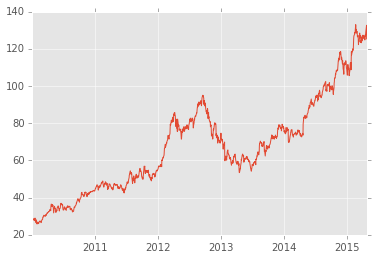

In [21]:
fig, ax = plt.subplots()

plt.plot(prices['Date'], prices['Adj Close'])

## Reshaping the data

Use the DataFrame method `set_index()` to create a DataFrame that uses the `"Date"` column as an index:

### Tidy the chart

Use the pandas Timeseries to generate ticks for the x-axis. Here's a [list of aliases for time periods](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) -- `'BQ'` stands for "business quarter end", for example. I've decided to use `'6m'` for "6 months". 


In [68]:
# fig, ax = plt.subplots()
# ax.plot(prices['Date'], prices['Adj Close'])
# redo the axes
# fix the ticks
# ax.set_xticks(pd.date_range('2010-01-01', '2015-05-01', freq = '6m'))
# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

In [39]:
dprices = prices.set_index('Date')
dprices.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-01,126.10000,130.13000,125.30000,128.95000,57195000,128.95000
2015-04-30,128.64000,128.64000,124.58000,125.15000,82475900,125.15000
2015-04-29,130.16000,131.59000,128.30000,128.64000,62410800,128.64000
2015-04-28,134.46001,134.53999,129.57001,130.56000,118580700,130.56000
2015-04-27,132.31000,133.13000,131.14999,132.64999,84783100,132.64999


This doesn't change anything about the number of rows or what they contain (other than that the `"Date"` column has been moved out of the columns and into the index). 

With `"Date"` no longer an actual column, the `plot()` call will refer to the `index` attribute of the DataFrame. But the visual output should be exactly the same as before.

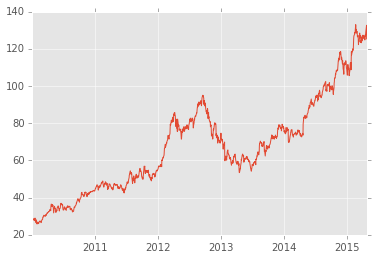

In [40]:
fig, ax = plt.subplots()
ax.plot(dprices.index, dprices['Adj Close'])

### Resampling

In the timespan of 2010 to 2015, there are more than 1,300 datapoints. When looking at stock trends over a half-decade period, is it necessary to see _each day_ represented on the graph? If we reduce the granularity of the data, we can still see the same trends in a clearer, less jagged graph, and the loss in _precision_ is irrelevant.

Let's see what the data looks like when charted as _weekly_ periods.

In terms of programmatic logic, this is a kind of [__groupby__](http://pandas.pydata.org/pandas-docs/stable/groupby.html) call, in which we group the index (i.e. the `"Date"`) by its year-month representation, e.g. `"2014-02"`.

However, switching up the frequency in a time-series is such a common scenario that _pandas_ has a helpful convenience function named [__resample()__](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.resample.html).

The only required argument for `resample()` is a string that specifies the frequency of sampling, such as `'W'` for _weekly_ and `'A'` for _annual_ (a [list of aliases can be found here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)). We can specify an optional `how` argument, for example, a string such as `'max'` or `'first'`, to get the _max_ value or the _first_ value, respectively, of every week. The default value of `how` is `'mean'`.

To resample the data such that we get the _weekly average_ of the stock price data: 

In [47]:
wkprices = dprices.resample('W', how = 'mean')  # 'mean' is default, but we'll be explicit here
wkprices.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-10,212.891994,213.863990,210.898000,212.384008,128626820,28.618940
2010-01-17,210.179996,211.151992,206.771994,208.767998,134477140,28.131680
2010-01-24,210.525002,212.887525,205.277482,208.147502,177005150,28.048070
2010-01-31,204.263988,207.338002,198.249994,201.647990,353741640,27.172254
2010-02-07,194.562006,197.377992,192.304002,195.465996,183575280,26.339226


Let's chart the `wkprices` data to see what it looks like; the result is slightly less jagged with no real loss in being able to interpret the trends:

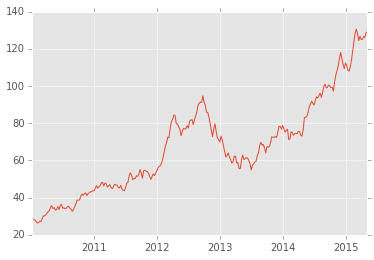

In [51]:
fig, ax = plt.subplots()
ax.plot(wkprices.index, wkprices['Adj Close'])

Let's break the data down by _monthly averages_. Then let's display the three data series on the same chart to see how the trendlines compare:

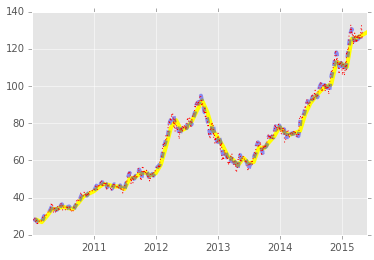

In [67]:
mthprices = dprices.resample('M', how = 'mean')

fig, ax = plt.subplots()
ax.plot(mthprices.index, mthprices['Adj Close'], linewidth = 4, color = 'yellow', )
ax.plot(wkprices.index, wkprices['Adj Close'], linewidth = 4, color = 'blue', alpha = 0.4, linestyle = '--')
ax.plot(dprices.index, dprices['Adj Close'], linewidth = 1, color = 'red', linestyle = ':')

It's an ugly graph, but the point is that when looking at 5+ year timespan, daily values end up being noise. The monthly averages seem to work just fine for our purposes so we'll stick to that.

## Making a nice chart

- Set the y-axis to a start at __0__
- Add some labels
- Clean up tick marks



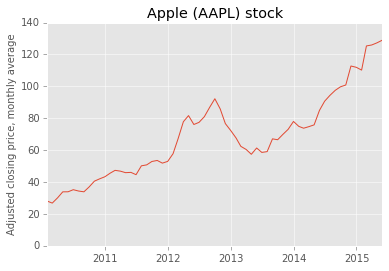

In [75]:
fig, ax = plt.subplots()
ax.plot(mthprices.index, mthprices['Adj Close'])
ax.set_ylim(ymin = 0)
ax.set_ylabel('Adjusted closing price, monthly average', fontsize=10)
ax.set_title('Apple (AAPL) stock')
# remove the ticks that are along the top and right side of the chart
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


## Adding context with another data series


Let's add computing rivals Dell (DELL), Hewlett-Packard (HPQ), Microsoft (MSFT), and Sony (SNE) to the analysis. And let's expand it to 1990. 

In [169]:
from collections import OrderedDict
NAMES = ['AAPL', 'DELL', 'HPQ', 'MSFT', 'SNE']
COLORS = ['red', 'gray', 'orange', 'green', 'blue']
data = OrderedDict({})

#### Getting the data

We'll have to redo the initial data collection from the Yahoo Finance historical price data: http://finance.yahoo.com/q/hp?s=AAPL. 

This is the same pattern as before, except in a for-loop. I've decided to create a dictionary called `data` that will hold a DataFrame for each company label. I could've arranged it to have one large DataFrame and then added a new column for the company label. But this works just fine.

In [170]:
for n in NAMES:
    csvurl = "http://real-chart.finance.yahoo.com/table.csv?s=%s&a=00&b=1&c=1990&d=04&e=1&f=2015&g=d" % n
    prices = pd.read_csv(csvurl, parse_dates = [0], index_col = 0)
    data[n] = prices.resample('M')

### Each series gets its own chart

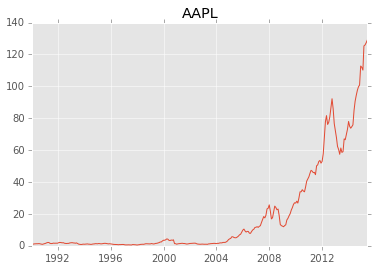

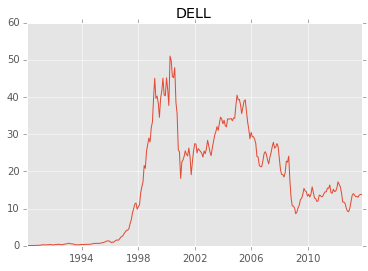

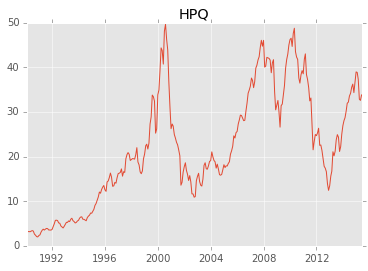

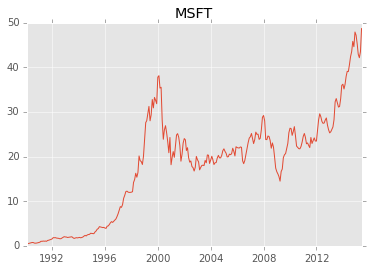

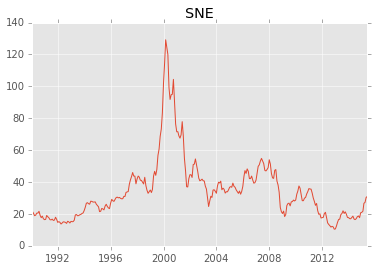

In [171]:
for name, prices in data.items():
    fig, ax = plt.subplots()
    ax.set_title(name)
    ax.plot(prices.index, prices['Adj Close'])
    


This is the laziest, most un-useful way to compare the data: make one chart for each company. One of the main problems with making separate charts is that _pandas_ will autoscale the axes for each series; the y-scale is different for each company, which is severely misleading as the top value for __HPQ__ is not at all the same as it is for __AAPL__, but you wouldn't know it without looking at the fine print of the labels.

### Multiple series on one chart


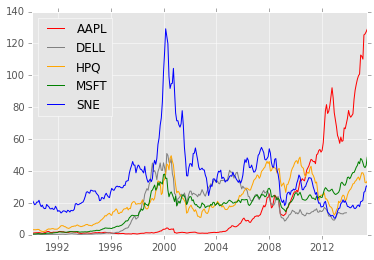

In [214]:
fig, ax = plt.subplots()
for i, (name, prices) in enumerate(data.items()):
    ax.plot(prices.index, prices['Adj Close'], label = name, color = COLORS[i])

ax.legend(loc = 'upper left')

By specifying the `label` arugment in each `plot()` call, the subsequent `legend()` call can properly match up each series to its color. The matplotlib docs have much more detail [on how to position and format legends](http://matplotlib.org/api/legend_api.html).

### Using subplots

So far, we've been using the __subplots()__ call even though we've only constructed and rendered one chart at a time. By passing in multiple arguments, we can specify a grid of axes to plot on.

(Check out this [tutorial example from the docs of how to use __subplots()__](http://matplotlib.org/examples/pylab_examples/subplots_demo.html))

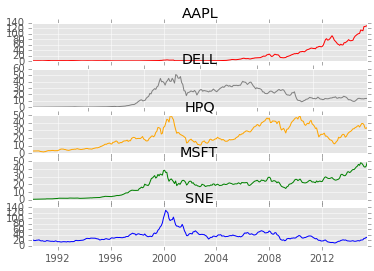

In [174]:
fig, axes = plt.subplots(5)
for i, (name, prices) in enumerate(data.items()):
    ax = axes[i]
    ax.set_title(name)
    ax.plot(prices.index, prices['Adj Close'], label = name, color = COLORS[i])



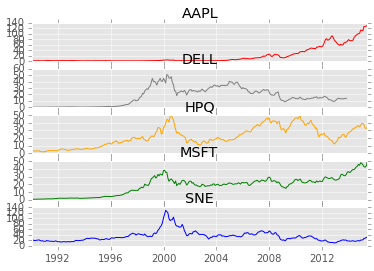

In [175]:
fig, axes = plt.subplots(5, sharex=True)
for i, (name, prices) in enumerate(data.items()):
    ax = axes[i]
    ax.set_title(name)
    ax.plot(prices.index, prices['Adj Close'], color = COLORS[i])


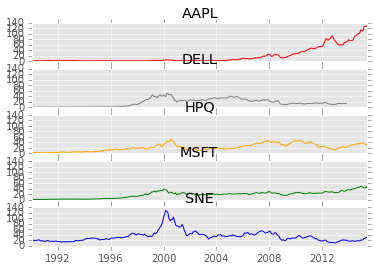

In [176]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
for i, (name, prices) in enumerate(data.items()):
    ax = axes[i]
    ax.set_title(name)
    ax.plot(prices.index, prices['Adj Close'], color = COLORS[i])

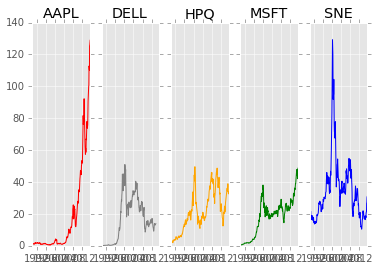

In [177]:
fig, axes = plt.subplots(1, 5, sharex=True, sharey=True)
for i, (name, prices) in enumerate(data.items()):
    ax = axes[i]
    ax.set_title(name)
    ax.plot(prices.index, prices['Adj Close'],  color = COLORS[i])
    

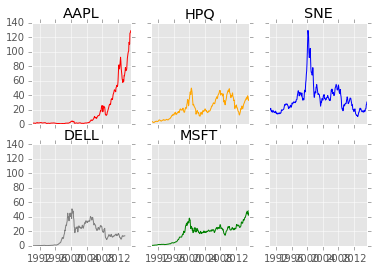

In [204]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
for i, (name, prices) in enumerate(data.items()):
    row_num = i / 2
    col_num = i % 2
    ax = axes[col_num][row_num]
    ax.set_title(name)
    ax.plot(prices.index, prices['Adj Close'],  color = COLORS[i])
    

pct_change http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.pct_change.html

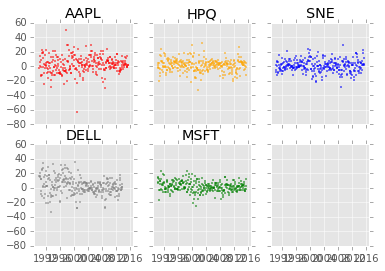

In [205]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
for i, (name, prices) in enumerate(data.items()):
    row_num = i / 2
    col_num = i % 2
    ax = axes[col_num][row_num]
    ax.set_title(name)
    ppchange = prices.pct_change()
    ax.scatter(ppchange.index, ppchange['Adj Close'] * 100,  color = COLORS[i], s=1)

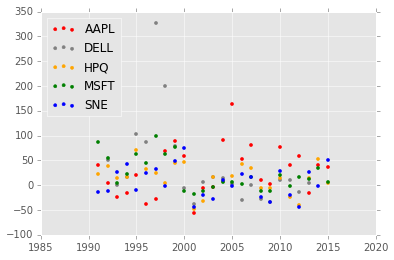

In [208]:
fig, ax = plt.subplots()
for i, (name, prices) in enumerate(data.items()):
    xprices = prices.resample('A')
    ppchange = xprices.pct_change()
    ax.scatter(ppchange.index.year, ppchange['Adj Close'] * 100,  color = COLORS[i], s=10, label = name)
plt.legend(loc = 'upper left')